<a href="https://colab.research.google.com/github/umbertogagl97/Tesi/blob/main/Richieste_prof/Istogrammi_GreenBit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import librerie

In [1]:
#Librerie
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

#Collegamento google drive

In [2]:
#collegamento google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Def var

In [17]:
materiali=['_Ecoflex','Gelatine','Latex','Liquid Ecoflex','RTV','WoodGlue']

#Path drive

In [5]:
pathPreds=F'/content/gdrive/MyDrive/GreenBit_attacks/list_apgd_nolatex.xlsx'

pathPredsOrig=F'/content/gdrive/MyDrive/Dataset_impronte/test/Preds_value/GreenBit_con_normalize.xlsx'

#Fun

##Accuracy per una singola classe

In [6]:
def accuracy_class(class_str,pd_class):
  '''
  class_str: string class
  pd_class: dataframe
  '''
  n=np.sum(pd_class['real']==class_str)
  print("# img"+class_str+": "+str(n))

  p=pd_class.loc[pd_class['real']==class_str]
  p=p.loc[p['predicted']==p['real']]
  n_class=p.count(0)[0]
  print("Numero di predizioni "+class_str+" giuste: "+str(n_class))
  print("Accuracy : "+str(round(n_class/n*100,2)))

##Accuracy per singolo materiale

In [7]:
def acc_mat(Test_tot,material):  
  df=Test_tot[Test_tot.index.str.contains(material)]
  n=df.count(0)[0]
  #print(f"numero di immagini spoof-spoof: {n}")
  # n numero di immagini spoof spoof
  m=df[df['predicted']=='Live'].count(0)[0]
  #print(f"numero di immagini perturbate con successo: {m}")
  acc=round((m/n)*100,2)
  #print(f"Accuracy attacco: {acc}%")
  return n,m,acc

#Caricamento dataframe

In [8]:
Test_orig=pd.read_excel(pathPredsOrig)
Test_orig=Test_orig[1000:] #solo le spoof
Test_orig.index=np.arange(1500)

Test_p=pd.read_excel(pathPreds)

#display(Test_orig)
#display(Test_p)

#Creazione datframe totale

In [ ]:
#unisco le due tabelle
Test_tot=Test_orig.join(Test_p,lsuffix='_original',rsuffix='_adv')
#rimuovo le colonne inutili e rinomino un'altra
Test_tot=Test_tot.drop(columns=['value_pred_live', 'value_pred_spoof','real_adv'])
Test_tot=Test_tot.rename(columns={"real_original": "real", "predicted_adv": "predicted"})
#pongo il nome come indice
Test_tot=Test_tot.set_index('name')
#prendo solo le immagini che sono state perturbate
Test_tot=Test_tot.loc[Test_tot['real']==Test_tot['predicted_original']]
display(Test_tot)

,predicted_original,real,predicted,prob_live,prob_spoof
name,,,,,
GreenBit_Ecoflex 00-50_004_0_0.png,Spoof,Spoof,Live,73.3103,26.6897
GreenBit_Ecoflex 00-50_004_0_4.png,Spoof,Spoof,Live,75.8441,24.1559
GreenBit_Ecoflex 00-50_004_0_5.png,Spoof,Spoof,Live,64.3591,35.6410
GreenBit_Ecoflex 00-50_004_0_9.png,Spoof,Spoof,Live,74.8566,25.1434
GreenBit_Ecoflex 00-50_004_1_0.png,Spoof,Spoof,Live,57.4858,42.5142
...,...,...,...,...,...
GreenBit_WoodGlue_020_8_4.png,Spoof,Spoof,Live,87.8404,12.1596
GreenBit_WoodGlue_020_8_9.png,Spoof,Spoof,Live,90.0029,9.9971
GreenBit_WoodGlue_020_9_0.png,Spoof,Spoof,Live,73.6403,26.3597


#Calcolo accuracy 

accuracy spoof dataset originale

In [ ]:
accuracy_class('Spoof',Test_orig)

# imgSpoof: 1500
Numero di predizioni Spoof giuste: 1470
Accuracy : 98.0


accuracy dataset adv solo per le immagini perturbate (che erano spoof spoof)

In [10]:
accuracy_class('Spoof',Test_tot)

NameError: ignored

In [ ]:
100-13.2

86.8

#Calcolo accuracy per materiale

In [12]:
df=pd.DataFrame()
for x in materiali:
  n,m,a=acc_mat(Test_p,x)
  df=df.append({
      'materiale' : x,
      'n_img' : n,
      'n_img_perturbate' : m,
      'accuracy_attacco' : a 
  },ignore_index=True)

AttributeError: ignored

#Istogramma

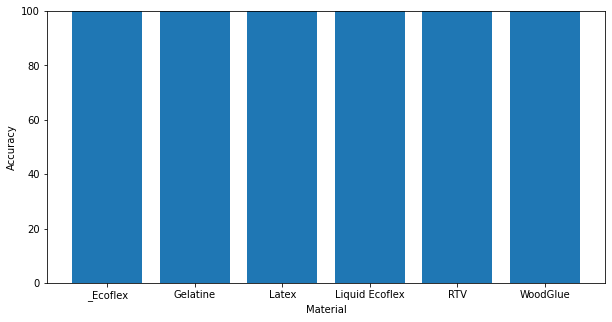

In [ ]:
fig = plt.figure(figsize=[10,5])
plt.bar(df.materiale.values, height=df.accuracy_attacco.values);
plt.xlabel('Material');
plt.ylim(0,100)
plt.ylabel('Accuracy');
#plt.savefig(attack_name+'.png')

In [18]:
n_mat=[]
for x in materiali:
  print(x)
  if x=='Latex': n=210
  else: n=Test_p[Test_p.name.str.contains(x)].count(0)[0]
  n_mat.append(n)
  print(n)

_Ecoflex
212
Gelatine
157
Latex
210
Liquid Ecoflex
190
RTV
180
WoodGlue
150


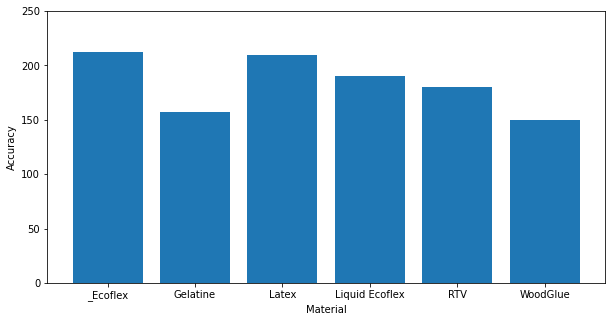

In [21]:
fig = plt.figure(figsize=[10,5])
plt.bar(materiali, height=n_mat);
plt.xlabel('Material');
plt.ylim(0,250)
plt.ylabel('Accuracy');
plt.savefig('hist_apgd_greenbit.png')